1. ***超参数***：可以调整但是不在训练过程中更新的参数
2. ***调参***：选择超参数的过程

In [13]:
import math
import numpy as np
import torch
from d2l import torch as d2l

In [41]:
# %load ../utils/Timer.py
import time
import numpy as np
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self._time = time
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = self._time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(self._time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()


In [29]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)
a,b

(tensor([1., 1., 1.,  ..., 1., 1., 1.]),
 tensor([1., 1., 1.,  ..., 1., 1., 1.]))

In [42]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
  c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.22430 sec'

In [43]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00100 sec'

In [46]:
def normal(x,mu,sigma):
  p = 1 / np.sqrt(2*np.pi*sigma**2)
  return p * np.exp(-0.5/sigma**2*(x-mu)**2)

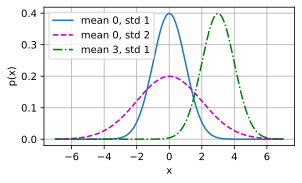

In [47]:
x = np.linspace(-7, 7, 1000)
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(
    x,
    [normal(x, mu, sigma) for mu, sigma in params],
    xlabel="x",
    ylabel="p(x)",
    figsize=(4.5, 2.5),
    legend=[f"mean {mu}, std {sigma}" for mu, sigma in params],
)